In [2]:
import numpy as np
np.random.seed(2020)  # for reproducibility
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import StandardScaler

In [3]:
#define our own evaluatino metrics
def maeyear(a,b):
    ymae = np.abs(np.sum(a) - np.sum(b))
    return ymae

def mae(a,b):
    ymae = np.mean(np.abs(a-b))
    return ymae

Train on 96432 samples, validate on 17544 samples
Epoch 1/50
96432/96432 [==============================] - 7s 71us/step - loss: 801481.3244 - mae: 695.5668 - yearerr: 13492.1328 - val_loss: 2064838.0190 - val_mae: 1202.1439 - val_yearerr: 74980.1250
Epoch 2/50
96432/96432 [==============================] - 7s 71us/step - loss: 482997.1314 - mae: 555.9169 - yearerr: 13104.4033 - val_loss: 725124.3184 - val_mae: 660.6259 - val_yearerr: 35248.6641
Epoch 3/50
96432/96432 [==============================] - 7s 71us/step - loss: 392362.0036 - mae: 494.6578 - yearerr: 13619.1455 - val_loss: 1487607.2498 - val_mae: 1058.1375 - val_yearerr: 66700.6875
Epoch 4/50
96432/96432 [==============================] - 7s 72us/step - loss: 353167.6716 - mae: 465.7754 - yearerr: 13733.4072 - val_loss: 613235.6915 - val_mae: 626.4456 - val_yearerr: 35054.1836
Epoch 5/50
96432/96432 [==============================] - 7s 71us/step - loss: 337021.2635 - mae: 453.6657 - yearerr: 13371.5605 - val_loss: 1040411.3

Epoch 42/50
96432/96432 [==============================] - 7s 71us/step - loss: 185133.5686 - mae: 342.2643 - yearerr: 8952.9785 - val_loss: 504283.3647 - val_mae: 613.5186 - val_yearerr: 36919.0078
Epoch 43/50
96432/96432 [==============================] - 7s 71us/step - loss: 185076.3928 - mae: 342.0011 - yearerr: 9139.7031 - val_loss: 675736.6207 - val_mae: 725.5090 - val_yearerr: 44905.5781
Epoch 44/50
96432/96432 [==============================] - 7s 72us/step - loss: 183915.4868 - mae: 340.7617 - yearerr: 8740.7588 - val_loss: 1295687.7851 - val_mae: 1044.8989 - val_yearerr: 66540.4453
Epoch 45/50
96432/96432 [==============================] - 7s 71us/step - loss: 182876.8197 - mae: 340.4014 - yearerr: 8899.9072 - val_loss: 665675.3553 - val_mae: 719.1888 - val_yearerr: 44661.0664
Epoch 46/50
96432/96432 [==============================] - 7s 72us/step - loss: 183672.5464 - mae: 340.9982 - yearerr: 8851.3506 - val_loss: 448124.4039 - val_mae: 576.6904 - val_yearerr: 33719.8594
Epo

Epoch 33/50
87672/87672 [==============================] - 6s 70us/step - loss: 247623.5012 - mae: 389.9796 - yearerr: 8358.6055 - val_loss: 131721.5726 - val_mae: 284.0462 - val_yearerr: 11971.5137
Epoch 34/50
87672/87672 [==============================] - 6s 69us/step - loss: 246337.1934 - mae: 389.5993 - yearerr: 8192.2178 - val_loss: 258453.4398 - val_mae: 393.5632 - val_yearerr: 21354.7363
Epoch 35/50
87672/87672 [==============================] - 6s 68us/step - loss: 244886.7490 - mae: 388.0032 - yearerr: 8130.1943 - val_loss: 139821.1090 - val_mae: 291.9923 - val_yearerr: 12207.4854
Epoch 36/50
87672/87672 [==============================] - 6s 69us/step - loss: 243441.7496 - mae: 386.8500 - yearerr: 8141.7388 - val_loss: 204984.2386 - val_mae: 350.0499 - val_yearerr: 18954.7246
Epoch 37/50
87672/87672 [==============================] - 6s 69us/step - loss: 242375.2714 - mae: 385.7935 - yearerr: 7835.7612 - val_loss: 134767.9423 - val_mae: 289.4514 - val_yearerr: 12485.6270
Epoch

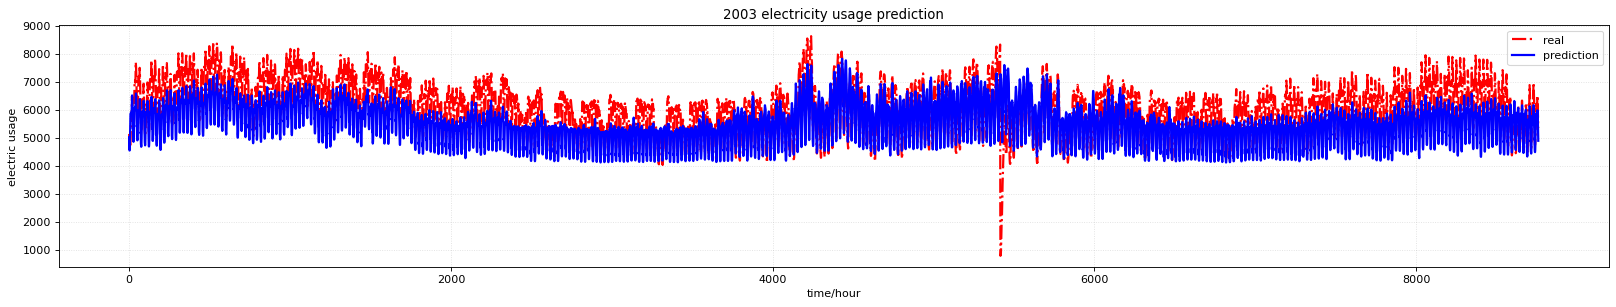

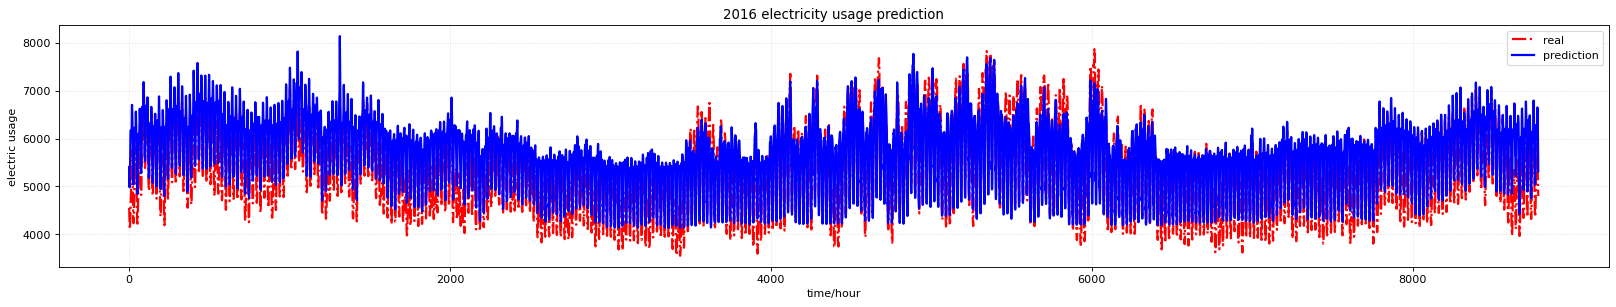

In [60]:
#collect results
ymaelist = []
maelist = []

for year in np.arange(2003,2017):

    pwd = "/home/jasperzhang/Documents/elec/"  #data directory path to be determined by yourself

    xtrain = pd.read_csv(pwd + "xtrain" + str(year) + ".csv")
    ytrain = pd.read_csv(pwd + "ytrain" + str(year) + ".csv")

    xtest = pd.read_csv(pwd + "xtest" + str(year) + ".csv")
    ytest = pd.read_csv(pwd + "ytest" + str(year) + ".csv")


    xval = pd.read_csv(pwd + "xval" + str(year) + ".csv")
    yval = pd.read_csv(pwd + "yval" + str(year) + ".csv")


    #data normalization
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    def scaleColumns(df, cols_to_scale):

        for col in cols_to_scale:

            df[col] = pd.DataFrame(sc.fit_transform(pd.DataFrame(df[col])),columns=[col])

        return df
    #normalize weather variables
    train_x = scaleColumns(xtrain,['precipitation','temperature','irradiance_surface','irradiance_toa','snowfall','snowfall','snow_depth','cloud_cover','air_density'])
    val_x = scaleColumns(xval,['precipitation','temperature','irradiance_surface','irradiance_toa','snowfall','snowfall','snow_depth','cloud_cover','air_density'])
    test_x = scaleColumns(xtest,['precipitation','temperature','irradiance_surface','irradiance_toa','snowfall','snowfall','snow_depth','cloud_cover','air_density'])
    train_y = ytrain
    val_y = yval
    test_y = ytest

    #hyperparameters setting
    n_input = xtrain.shape[1]
    n_hidden_1 = n_input * 2  
    n_hidden_2 = n_input * 4 
    n_hidden_3 = n_input * 2 
    n_classes = 1 
    training_epochs = 50
    batch_size = 64  


    #model
    model = Sequential()
    model.add(Dense(n_hidden_1, activation='relu', input_dim=n_input)) 
    model.add(Dense(n_hidden_2, activation='relu'))
    model.add(Dense(n_hidden_3, activation='relu'))
    model.add(Dense(n_classes)) 


    #define our own performance evaluation year error
    import keras.backend as K
    def yearerr(y_true, y_pred):
        a = K.sum(y_true) - K.sum(y_pred)
        b = K.abs(a)
        return b

    #compile
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae',yearerr])

    #model fit; train on traning set and validate on test sets
    fit = model.fit(train_x, train_y, batch_size=batch_size, epochs=training_epochs,  validation_data=(test_x, test_y))

    #make prediction on proposed validation set IE the selected year
    pred_y = model.predict(val_x)

    #calculate two evaluation metrics
    pred_mae = mae(yval, pred_y)
    pred_ymae = maeyear(yval, pred_y)

    #collect the results
    #maelist.append(pred_mae)
    #ymaelist.append(pred_ymae)

    #visualize the result of the current training round and save
    import matplotlib.pyplot as plt

    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    # plot size
    plt.figure(figsize=(25, 4), dpi=80)
    plt.plot(range(len(val_y)), val_y, ls='-.',lw=2,c='r',label='real')
    plt.plot(range(len(pred_y)), pred_y, ls='-',lw=2,c='b',label='prediction')

    # plot grid
    plt.grid(alpha=0.4, linestyle=':')
    plt.legend()
    plt.xlabel('time/hour') 
    plt.ylabel('electric usage')
    plt.title(str(year) + ' electricity usage prediction')
    # display
    #plt.show()
    plt.savefig(pwd + 'plot/' + str(year) +'prediction.png')

In [53]:
#save maelist
pd.DataFrame(maelist).to_csv(pwd + "maelist.csv")

In [54]:
#save ymaelist
pd.DataFrame(ymaelist).to_csv(pwd + "ymaelist.csv")

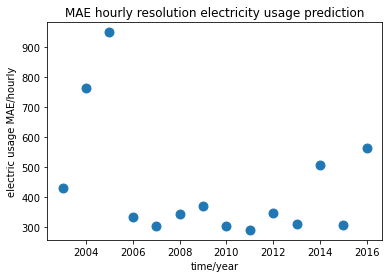

In [51]:
#visualize MAE hourly 
plt.scatter(np.arange(2003,2017), maelist, s=80, marker="o")
plt.title('MAE hourly resolution electricity usage prediction')
plt.xlabel('time/year') 
plt.ylabel('electric usage MAE/hourly')
plt.savefig(pwd + 'plot/' + 'MAE hourly prediction.png')

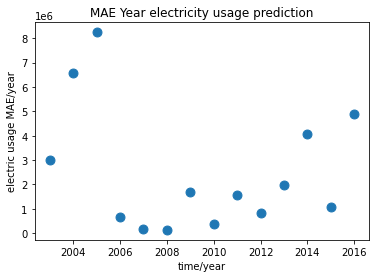

In [55]:
#visualize MAE yearly
plt.scatter(np.arange(2003,2017), ymaelist, s=80, marker="o")
plt.title('MAE Year electricity usage prediction')
plt.xlabel('time/year') 
plt.ylabel('electric usage MAE/year')
plt.savefig(pwd + 'plot/' + 'MAE Year prediction.png')